<a href="https://colab.research.google.com/github/juancamilocetina/Taller_Inferencia/blob/main/Trabajo_Inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libreria
install.packages(c('corrplot','samplingbook','TeachingDemos','readxl','readr','dplyr','ggplot2','boot','bbmle','descr','Hmisc','psych'))
devtools::install_github('fhernanb/stests', force=TRUE)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘lpSolve’, ‘minqa’, ‘mitools’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘tmvnsim’, ‘pps’, ‘sampling’, ‘survey’, ‘numDeriv’, ‘bdsmatrix’, ‘mvtnorm’, ‘xtable’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘mnormt’





expm (NA -> 0.999-6) [CRAN]


Installing 1 packages: expm

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp3qBjob/remotes3f7f729412/fhernanb-stests-02317bd/DESCRIPTION’ ... OK
* preparing ‘stests’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘stests_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)
library(samplingbook)
library(TeachingDemos)
library(readxl)
library(ggplot2)
library(dplyr)
library(boot)
library(stats4) # para la funcion mle
library(bbmle) # para la funcion mle2
library(descr)
library(Hmisc)
library(stests)
library(psych)

corrplot 0.92 loaded

Loading required package: pps

Loading required package: sampling

Loading required package: survey

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survival’


The following objects are masked from ‘package:sampling’:

    cluster, strata



Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘boot’


The following object is masked from ‘package:survival’:

    aml



Attaching package: ‘bbmle’


The following object is masked from ‘package:dplyr’:

    slice


Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:boot’:

    melanoma


Loading required package: Form

In [ ]:
url_ds <- 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_ratings_raw.csv'

In [ ]:
# Importación de los datos
library(readr)
dataset <- read_csv(url_ds)

New names:
• `` -> `...1`
• `` -> `...52`
Rows: 1312 Columns: 53
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (31): Species, Owner, Country of Origin, Farm Name, Lot Number, Mill, IC...
dbl (14): ...1, quality_score, Number of Bags, Aroma, Flavor, Aftertaste, Ac...
lgl  (8): view_certificate_1, view_certificate_2, Cupping Protocol and Descr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(dataset)

...1,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,⋯,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,...52,Notes
<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
0,90.58,NA,NA,NA,NA,NA,Arabica,metad plc,Ethiopia,⋯,0,Green,0 full defects,NA,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, Ethiopia","Aman Adinew (Emebet Dinku) - +251-116-292534, +251-911-519196",NA,NA
1,89.92,NA,NA,NA,NA,NA,Arabica,metad plc,Ethiopia,⋯,0,Green,1 full defects,NA,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, Ethiopia","Aman Adinew (Emebet Dinku) - +251-116-292534, +251-911-519196",NA,NA
2,89.75,NA,NA,NA,NA,NA,Arabica,Grounds for Health Admin,Guatemala,⋯,0,NA,0 full defects,NA,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NA,NA
3,89.00,NA,NA,NA,NA,NA,Arabica,Yidnekachew Dabessa,Ethiopia,⋯,0,Green,2 full defects,NA,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, Ethiopia","Aman Adinew (Emebet Dinku) - +251-116-292534, +251-911-519196",NA,NA
4,88.83,NA,NA,NA,NA,NA,Arabica,metad plc,Ethiopia,⋯,0,Green,2 full defects,NA,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, Ethiopia","Aman Adinew (Emebet Dinku) - +251-116-292534, +251-911-519196",NA,NA
5,88.83,NA,NA,NA,NA,NA,Arabica,Ji-Ae Ahn,Brazil,⋯,0,Bluish-Green,1 full defects,NA,"September 3rd, 2014",Specialty Coffee Institute of Asia,"3F, 259-1 Ulgiro-3-ga, Joong-gu, Seoul, South Korea, Zip code:100-847","Sung-Yong Steven Kil - 82-10-7912-1456-English, 82-2269-1456-Korean",NA,NA


In [ ]:
# Trasnformación de las cadenas de caracteres en variables categóricas (factores)
library(dplyr)
dataset <- dataset %>%
  mutate_if(is.character,factor)

In [ ]:
class(dataset)

[1] "tbl_df"     "tbl"        "data.frame"

In [ ]:
# Extracción del data frame
dataset <-  data.frame(dataset)

In [ ]:
# Selección de algunas variables para el análisis (es selección de cada uno):
dataset_sel <- dataset[,c('Country.of.Origin','quality_score','Number.of.Bags','Aroma','Harvest.Year')]
head(dataset_sel)

,Country.of.Origin,quality_score,Number.of.Bags,Aroma,Harvest.Year
,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,Ethiopia,90.58,300,8.67,2014
2,Ethiopia,89.92,300,8.75,2014
3,Guatemala,89.75,5,8.42,NA
4,Ethiopia,89.00,320,8.17,2014
5,Ethiopia,88.83,300,8.25,2014
6,Brazil,88.83,100,8.58,2013


In [ ]:
# Esta es una función muy útil para crear gráficas múltiples
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  plots <- c(list(...), plotlist)
  numPlots = length(plots)
  if (is.null(layout)) {
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  if (numPlots==1) {
    print(plots[[1]])
  } else {
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    for (i in 1:numPlots) {
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [ ]:
dataset_sel1 <- dataset[,c('Country.of.Origin','Harvest.Year','quality_score')]
head(dataset_sel1)

,Country.of.Origin,Harvest.Year,quality_score
,<fct>,<fct>,<dbl>
1,Ethiopia,2014,90.58
2,Ethiopia,2014,89.92
3,Guatemala,NA,89.75
4,Ethiopia,2014,89.00
5,Ethiopia,2014,88.83
6,Brazil,2013,88.83


In [ ]:
dataset1 = filter(dataset_sel1, Harvest.Year %in% c("2010","2011","2012","2013","2014","2015","2016","2017"),
            !is.na(dataset_sel1$Harvest.Year), quality_score>50)
head(dataset1)

,Country.of.Origin,Harvest.Year,quality_score
,<fct>,<fct>,<dbl>
1,Ethiopia,2014,90.58
2,Ethiopia,2014,89.92
3,Ethiopia,2014,89.00
4,Ethiopia,2014,88.83
5,Brazil,2013,88.83
6,Peru,2012,88.75


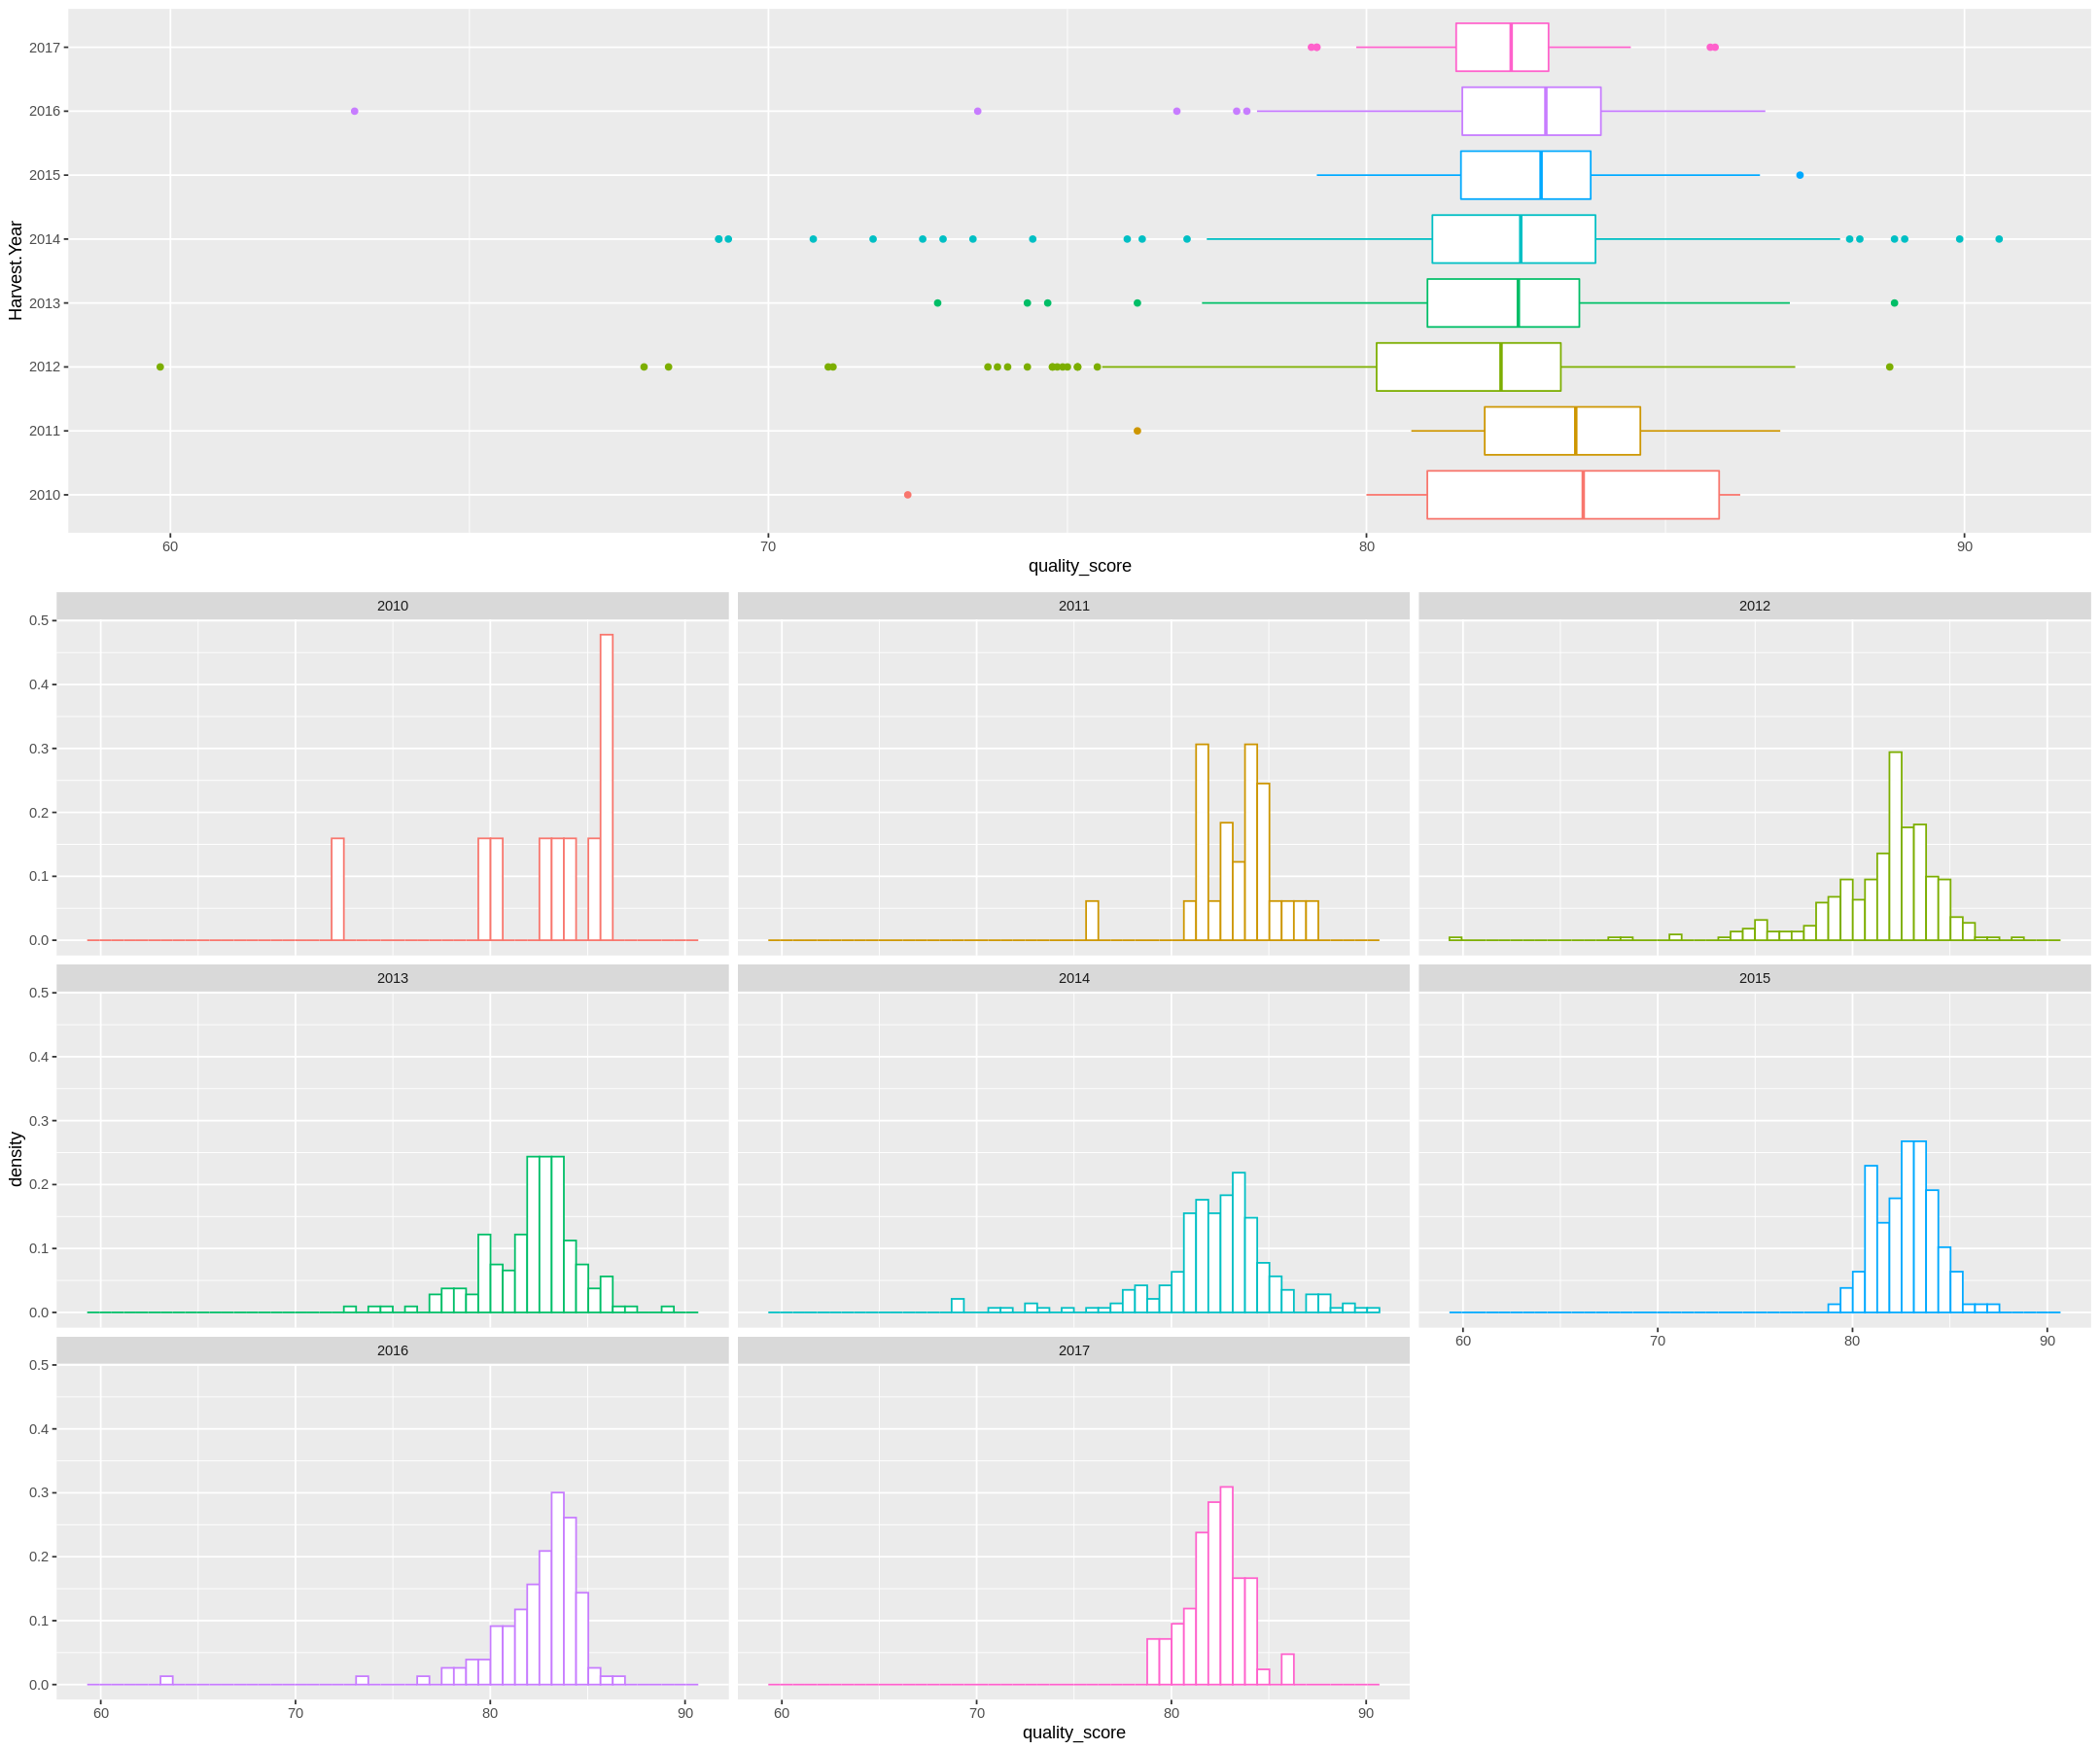

In [ ]:
#Grafica de cajas
#Harvest Year VS Quality Score
options(repr.plot.width = 18, repr.plot.height = 15)
multiplot(
  ggplot(dataset1, aes(x = Harvest.Year, y = quality_score, col = Harvest.Year)) +
    geom_boxplot() + theme(legend.position = 'none') +
    coord_flip(),
  ggplot(dataset1, aes(x = quality_score)) + 
    geom_histogram(aes(y = ..density.., col = Harvest.Year), bins = 50,
                   fill = 'white') + theme(legend.position = 'none') +
    facet_wrap(~Harvest.Year),
  layout = matrix(c(1,2,2), ncol = 1))

In [ ]:
aggregate(quality_score~Harvest.Year, data = dataset1, FUN=mean)

Harvest.Year,quality_score
<fct>,<dbl>
2010,82.66600
2011,83.33000
2012,81.51864
2013,82.17029
2014,82.18115
2015,82.75824
2016,82.41664
2017,82.23776


In [ ]:
#PAISES LATINOAMERICANOS
dataset2 = filter(dataset_sel1, Harvest.Year %in% c("2010","2011","2012","2013","2014","2015","2016","2017"),
            !is.na(dataset_sel1$Harvest.Year), 
            Country.of.Origin %in% c("Colombia","El Salvador","Costa Rica","Mexico","Brazil","Guatemala","Peru","Venezuela"), quality_score>50)
head(dataset2,100)

,Country.of.Origin,Harvest.Year,quality_score
,<fct>,<fct>,<dbl>
1,Brazil,2013,88.83
2,Peru,2012,88.75
3,Costa Rica,2014,87.17
4,Mexico,2012,87.17
5,Brazil,2011,86.92
6,Brazil,2011,86.42
7,Brazil,2010,86.17
8,Brazil,2010,86.17
9,Brazil,2011,86.08


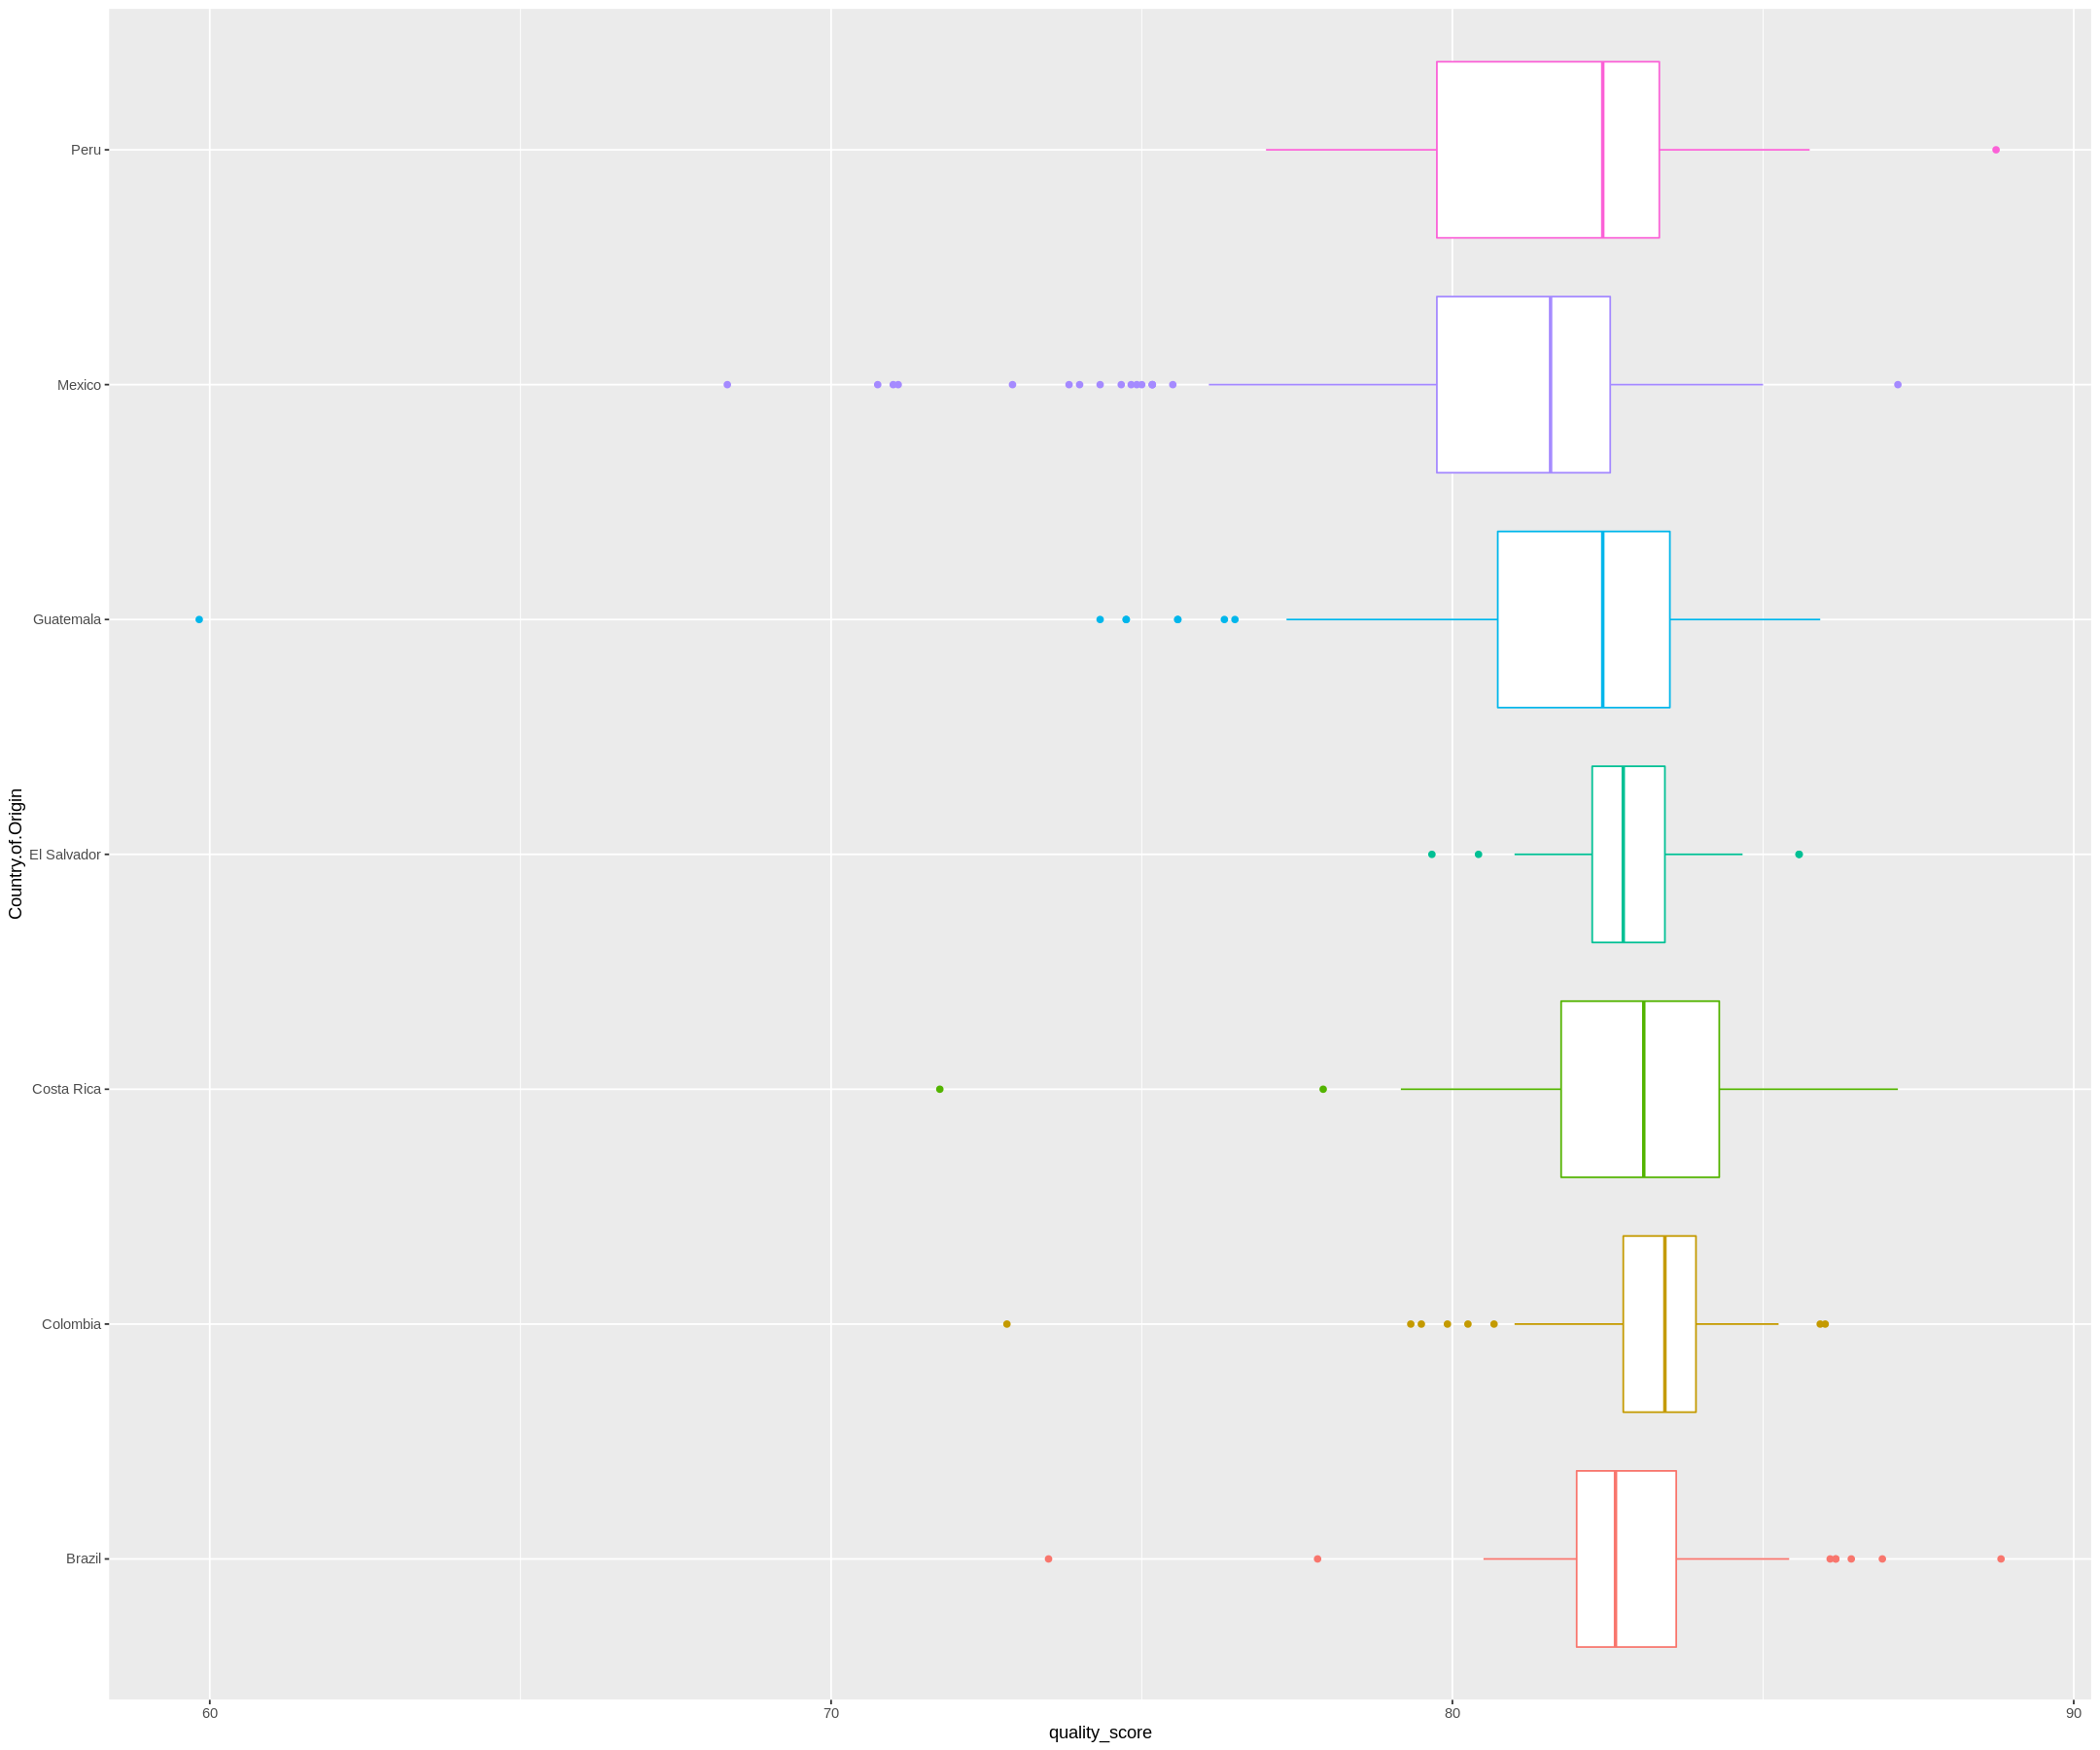

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 15)
multiplot(
  ggplot(dataset2, aes(x = Country.of.Origin, y = quality_score, col = Country.of.Origin)) +
    geom_boxplot() + theme(legend.position = 'none') +
    coord_flip(),
  layout = matrix(c(1,2,2), ncol = 1))

Para calcular el sesgo vamos a hacer uso de un proceso llamado remuestreo. Usaremos la calificación del producto (quality_score) para esto, lo extraeremos del objeto dataset2 y lo denominaremos muestra:

In [ ]:
head(dataset2)

,Country.of.Origin,Harvest.Year,quality_score
,<fct>,<fct>,<dbl>
1,Brazil,2013,88.83
2,Peru,2012,88.75
3,Costa Rica,2014,87.17
4,Mexico,2012,87.17
5,Brazil,2011,86.92
6,Brazil,2011,86.42


In [ ]:
aggregate(quality_score~Country.of.Origin, data = dataset2, FUN=mean)

Country.of.Origin,quality_score
<fct>,<dbl>
Brazil,82.86806
Colombia,83.23643
Costa Rica,82.68426
El Salvador,82.82000
Guatemala,81.80372
Mexico,80.87918
Peru,82.28778


In [ ]:
#Denominamos el objeto dataset2 como muestra
muestra <- dataset2$quality_score

In [ ]:
#le asignamos el tamaño del objeto a la variable n
n <- length(muestra)
#Calculamos la varianza y la asignamos a varmedia
varmedia <- var(muestra)/n

In [ ]:
#Calculamos la desviación media con la raíz de la varianza
desvmedia <- sqrt(varmedia)

In [ ]:
varmedia

[1] 0.009816183

In [ ]:
desvmedia

[1] 0.09907665

In [ ]:
length(muestra)

[1] 691

In [ ]:
# Remuestreo
B <- 1e+04
media <- numeric(B)
mediana <- numeric(B)
for (k in 1:B) {
    remuestra <- sample(muestra, n, replace = TRUE)
    media[k] <- mean(remuestra)
    # remordenada <- sort(remuestra)
    # mediana[k] <- remordenada[8]
    mediana[k] <- median(remuestra)
}

In [ ]:
#Calculamos el sesgo
sesgomediaboot <- mean(media) - mean(muestra)
sesgomedianaboot <- median(mediana) - median(muestra)

In [ ]:
sesgomediaboot

[1] 0.0001758509

In [ ]:
sesgomedianaboot

[1] 0

In [ ]:
mean(media)

[1] 81.99342

In [ ]:
median(mediana)

[1] 82.5

La tendencia central de las calificaciones es 82.5, el valor de la mediana.
El sesgo positivo nos indica que el sistema de medición está por encima del valor real


# INFERENCIA

In [ ]:
# Vamos a usar los (quality_score) como variable

#Sesgo

muestra <- dataset2$quality_score

n <- length(muestra)
varmedia <- (1/(n^2)) * sum((muestra - mean(muestra))^2)
desvmedia <- sqrt(varmedia)
c(varmedia,desvmedia)

[1] 0.009801977 0.099004936

In [ ]:
# Coeficiente de variación
desvmedia/mean(muestra)

statistic <- function(data, i){
  remuestra <- data[i]
  c(mean(remuestra), median(remuestra))
}

set.seed(1)

B <- 1e+04

media <- numeric(B)
mediana <- numeric(B)
for (k in 1:B) {
  remuestra <- sample(muestra, n, replace = TRUE)
  media[k] <- mean(remuestra)
  # remordenada <- sort(remuestra)
  # mediana[k] <- remordenada[8]
  mediana[k] <- median(remuestra)
}

res.boot <- boot(muestra, statistic, R = B)
res.boot

[1] 0.001207477


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = muestra, statistic = statistic, R = B)


Bootstrap Statistics :
    original        bias    std. error
t1* 81.99324 -0.0006111679  0.10016195
t2* 82.50000 -0.0164610000  0.07646666

In [ ]:
# Eficiencia
# var(media)
# var(mediana)

### Estimadores puntuales:
# Media
# mean(muestra)
aggregate(quality_score~Harvest.Year, data = dataset1, FUN=mean)
# var(muestra)
# sd(muestra)

Harvest.Year,quality_score
<fct>,<dbl>
2010,82.66600
2011,83.33000
2012,81.51864
2013,82.17029
2014,82.18115
2015,82.75824
2016,82.41664
2017,82.23776


In [ ]:
### Estimadores puntuales:
# Media
aggregate(quality_score~Country.of.Origin, data = dataset2, FUN=mean)

Country.of.Origin,quality_score
<fct>,<dbl>
Brazil,82.86806
Colombia,83.23643
Costa Rica,82.68426
El Salvador,82.82000
Guatemala,81.80372
Mexico,80.87918
Peru,82.28778


In [ ]:
## Estimadores por Maxima Verosimilitud
x <- dataset2$quality_score # Para trabajar con los datos muestrales que requerimos
NegLogLik = function(mu,sigma){-sum(dnorm(x,mu,sigma,log = TRUE))}
m.mu<-mean(dataset2$quality_score) # Media
m.sigma<-sd(dataset2$quality_score)

EMV1 = mle(NegLogLik, start = list(mu=m.mu, sigma=m.sigma))
summary(EMV1) # Para visualizar los valores

EMV2 = mle2(NegLogLik,
            start = list(mu=m.mu,sigma=m.sigma),
            data = list(x)) # La otra función
summary(EMV2)

Maximum likelihood estimation

Call:
mle(minuslogl = NegLogLik, start = list(mu = m.mu, sigma = m.sigma))

Coefficients:
       Estimate Std. Error
mu    81.993242 0.09900494
sigma  2.602531 0.07000703

-2 log L: 3282.834 

Maximum likelihood estimation

Call:
mle2(minuslogl = NegLogLik, start = list(mu = m.mu, sigma = m.sigma), 
    data = list(x))

Coefficients:
       Estimate Std. Error z value     Pr(z)    
mu    81.993242   0.099005 828.173 < 2.2e-16 ***
sigma  2.602531   0.070007  37.175 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

-2 log L: 3282.834 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  59.83   81.17   82.50   81.99   83.50   88.83 

[1] 2.6

media,82.0
desv,2.6
N,691.0
error.est,0.1
error,0.2
lim.inf,81.8
lim.sup,82.2


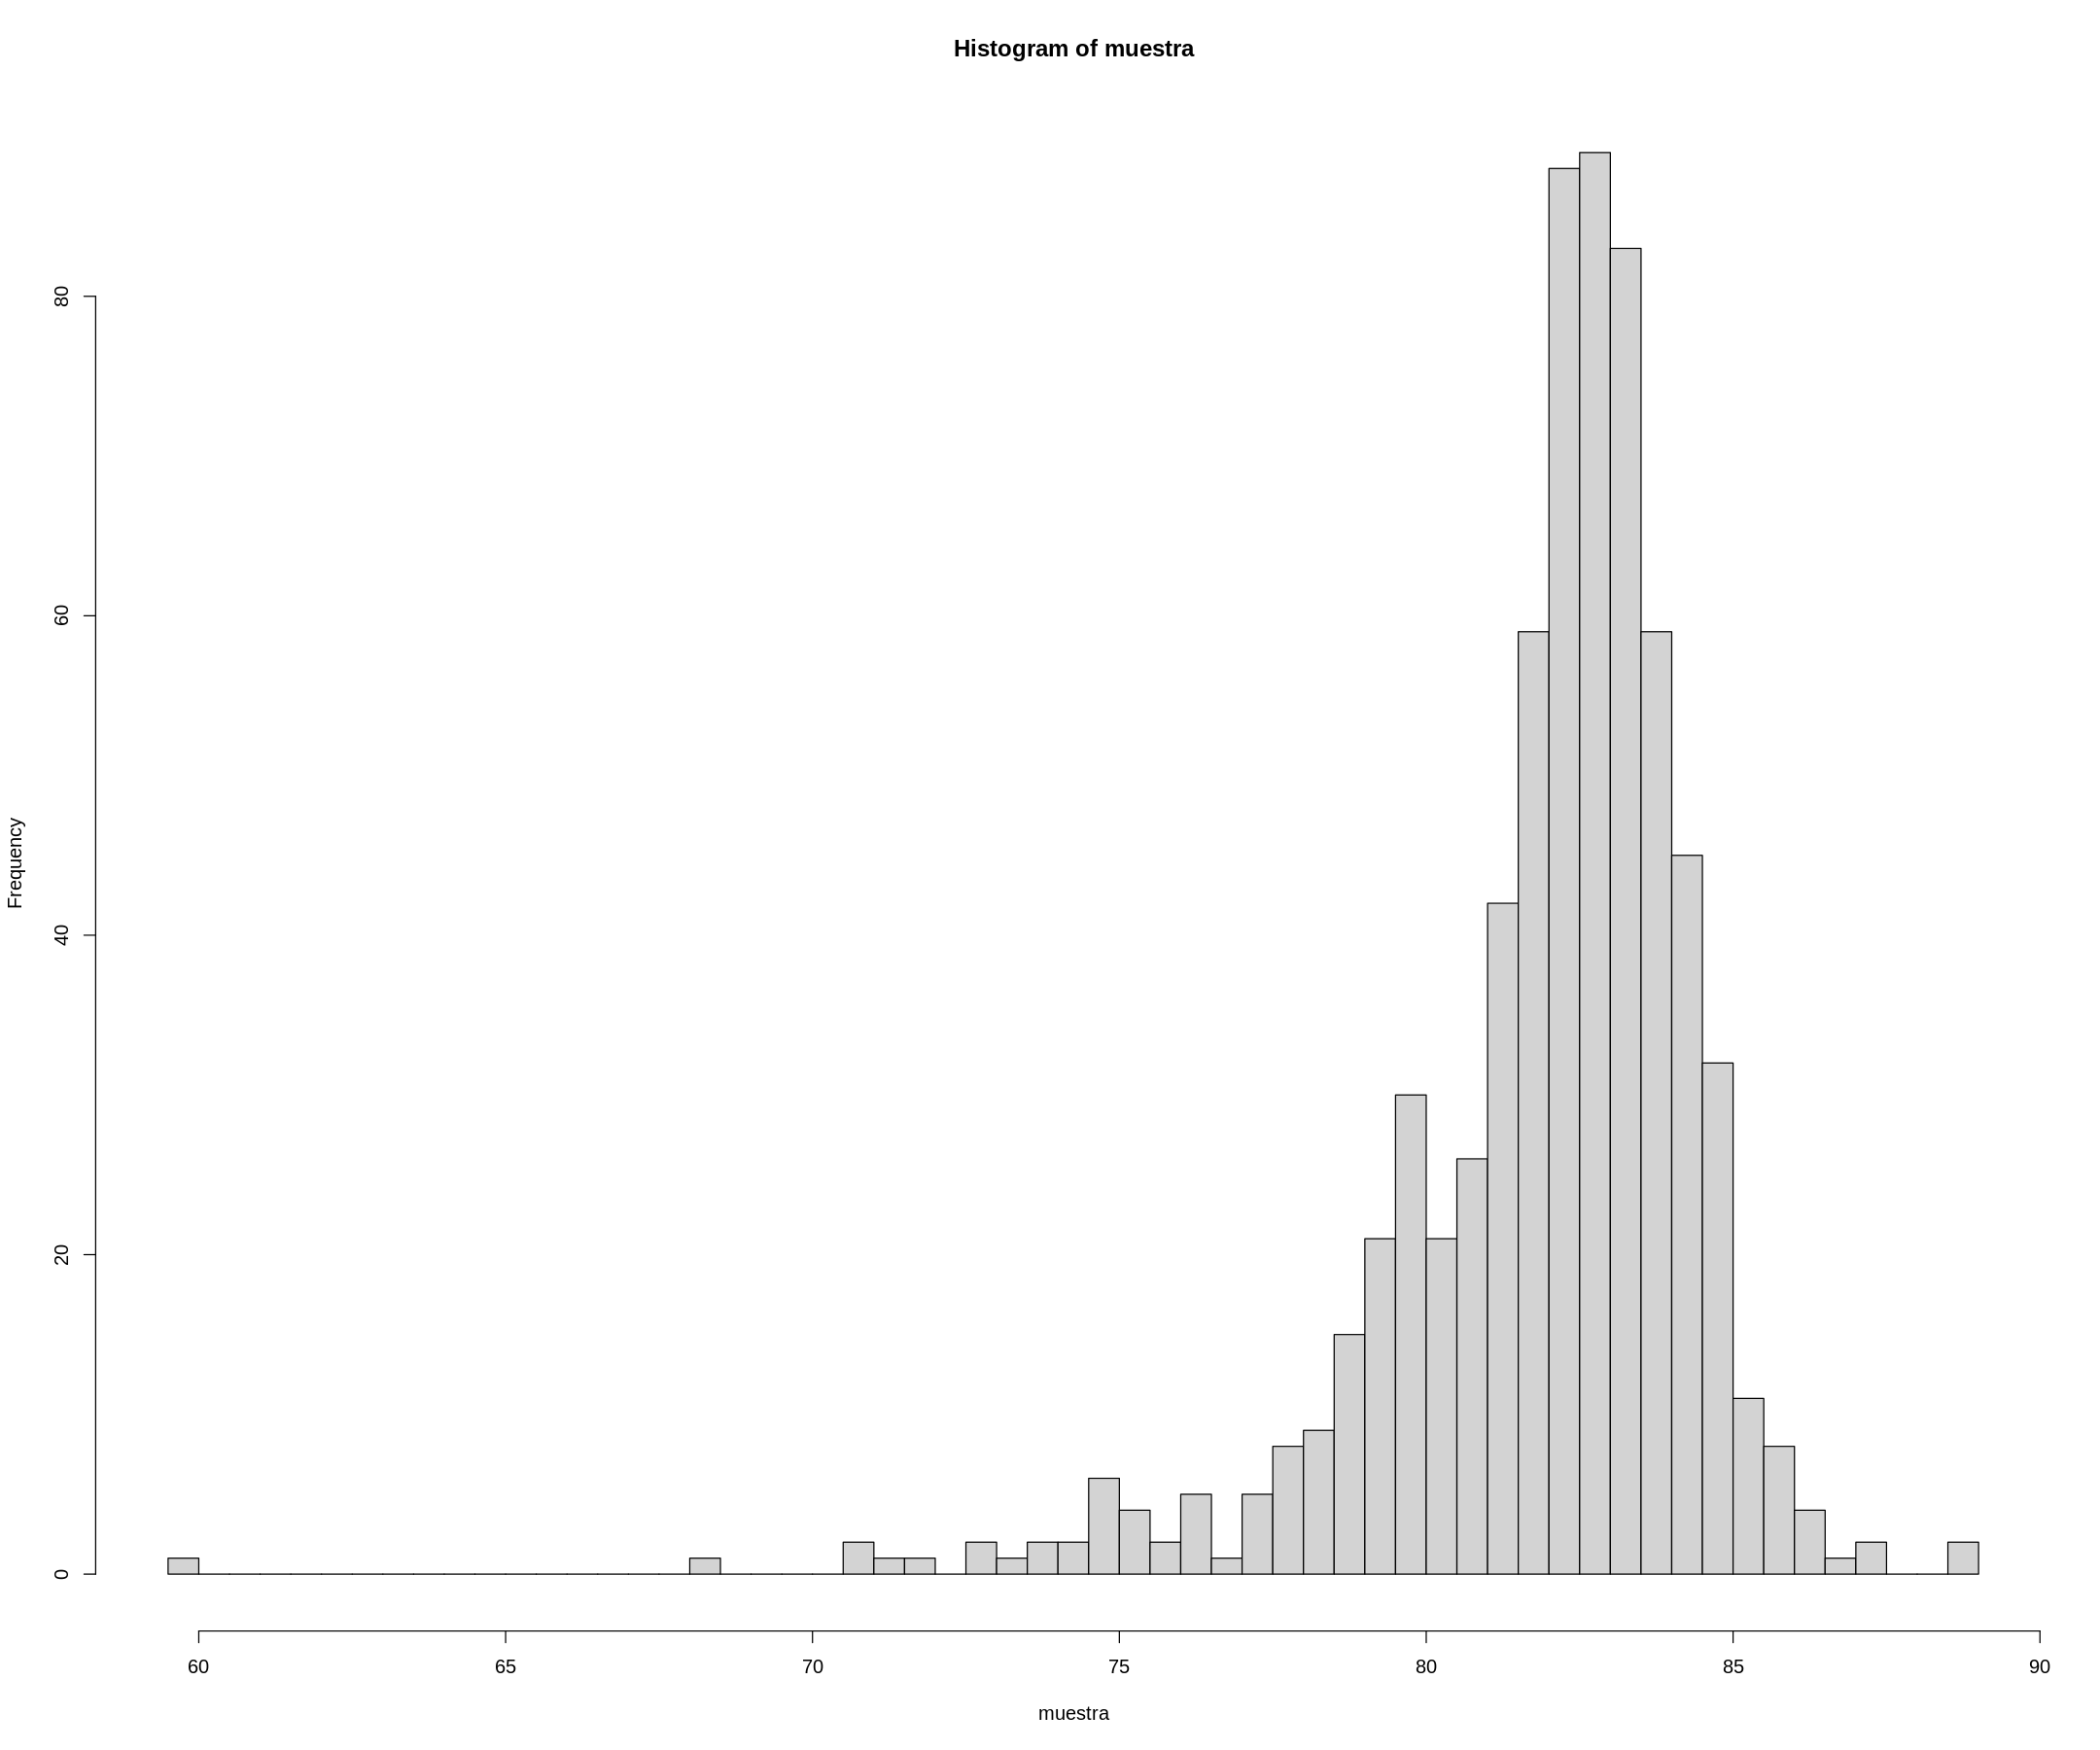

In [ ]:
########### Estimacion por Intervalos
summary(muestra)
hist(muestra, breaks = 50)
round(sd(muestra),2)

# Si suponemos que conocemos la varianza
media <- mean(muestra) # Pedimos la media
desv <- sd(muestra) # La desviaci?n est?ndar
N <- length(muestra) # El tama?o v?lido de la muestra
error.est <- desv/sqrt(N) # Calculamos el error est?ndar
error <- 1.96*error.est # Fijamos Z=1.96 para indicar un nivel de confianza de 95%
lim.inf <- media-error # L?mite inferior del intervalo
lim.sup <- media+error # L?mite superior del intervalo

resultado1 <- data.frame(media, desv, N, error.est, error, lim.inf, lim.sup)
round(t(resultado1),1)

In [ ]:
# O usando la funcion
# z.test(muestra, stdev = sd(muestra), conf.level = 0.95)
z.test(muestra,sigma2 = sd(muestra), conf.level = 0.95)


	One Sample z-test

data:  muestra
Z = 1335.6, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 81.87291 82.11357
sample estimates:
mean of muestra 
       81.99324 


[1] 1.963408

media,82.0
desv,2.6
N,691.0
error.est,0.1
error,0.2
lim.inf,81.8
lim.sup,82.2



	One Sample t-test

data:  muestra
t = 0, df = 690, p-value = 1
alternative hypothesis: true mean is not equal to 81.99324
95 percent confidence interval:
 81.79871 82.18777
sample estimates:
mean of x 
 81.99324 


,Frequency,Percent
08/09 crop,0,0.0000000
1t/2011,0,0.0000000
1T/2011,0,0.0000000
2009 - 2010,0,0.0000000
2009 / 2010,0,0.0000000
2009-2010,0,0.0000000
2009/2010,0,0.0000000
2010,10,0.9107468
2010-2011,0,0.0000000
2011,26,2.3679417


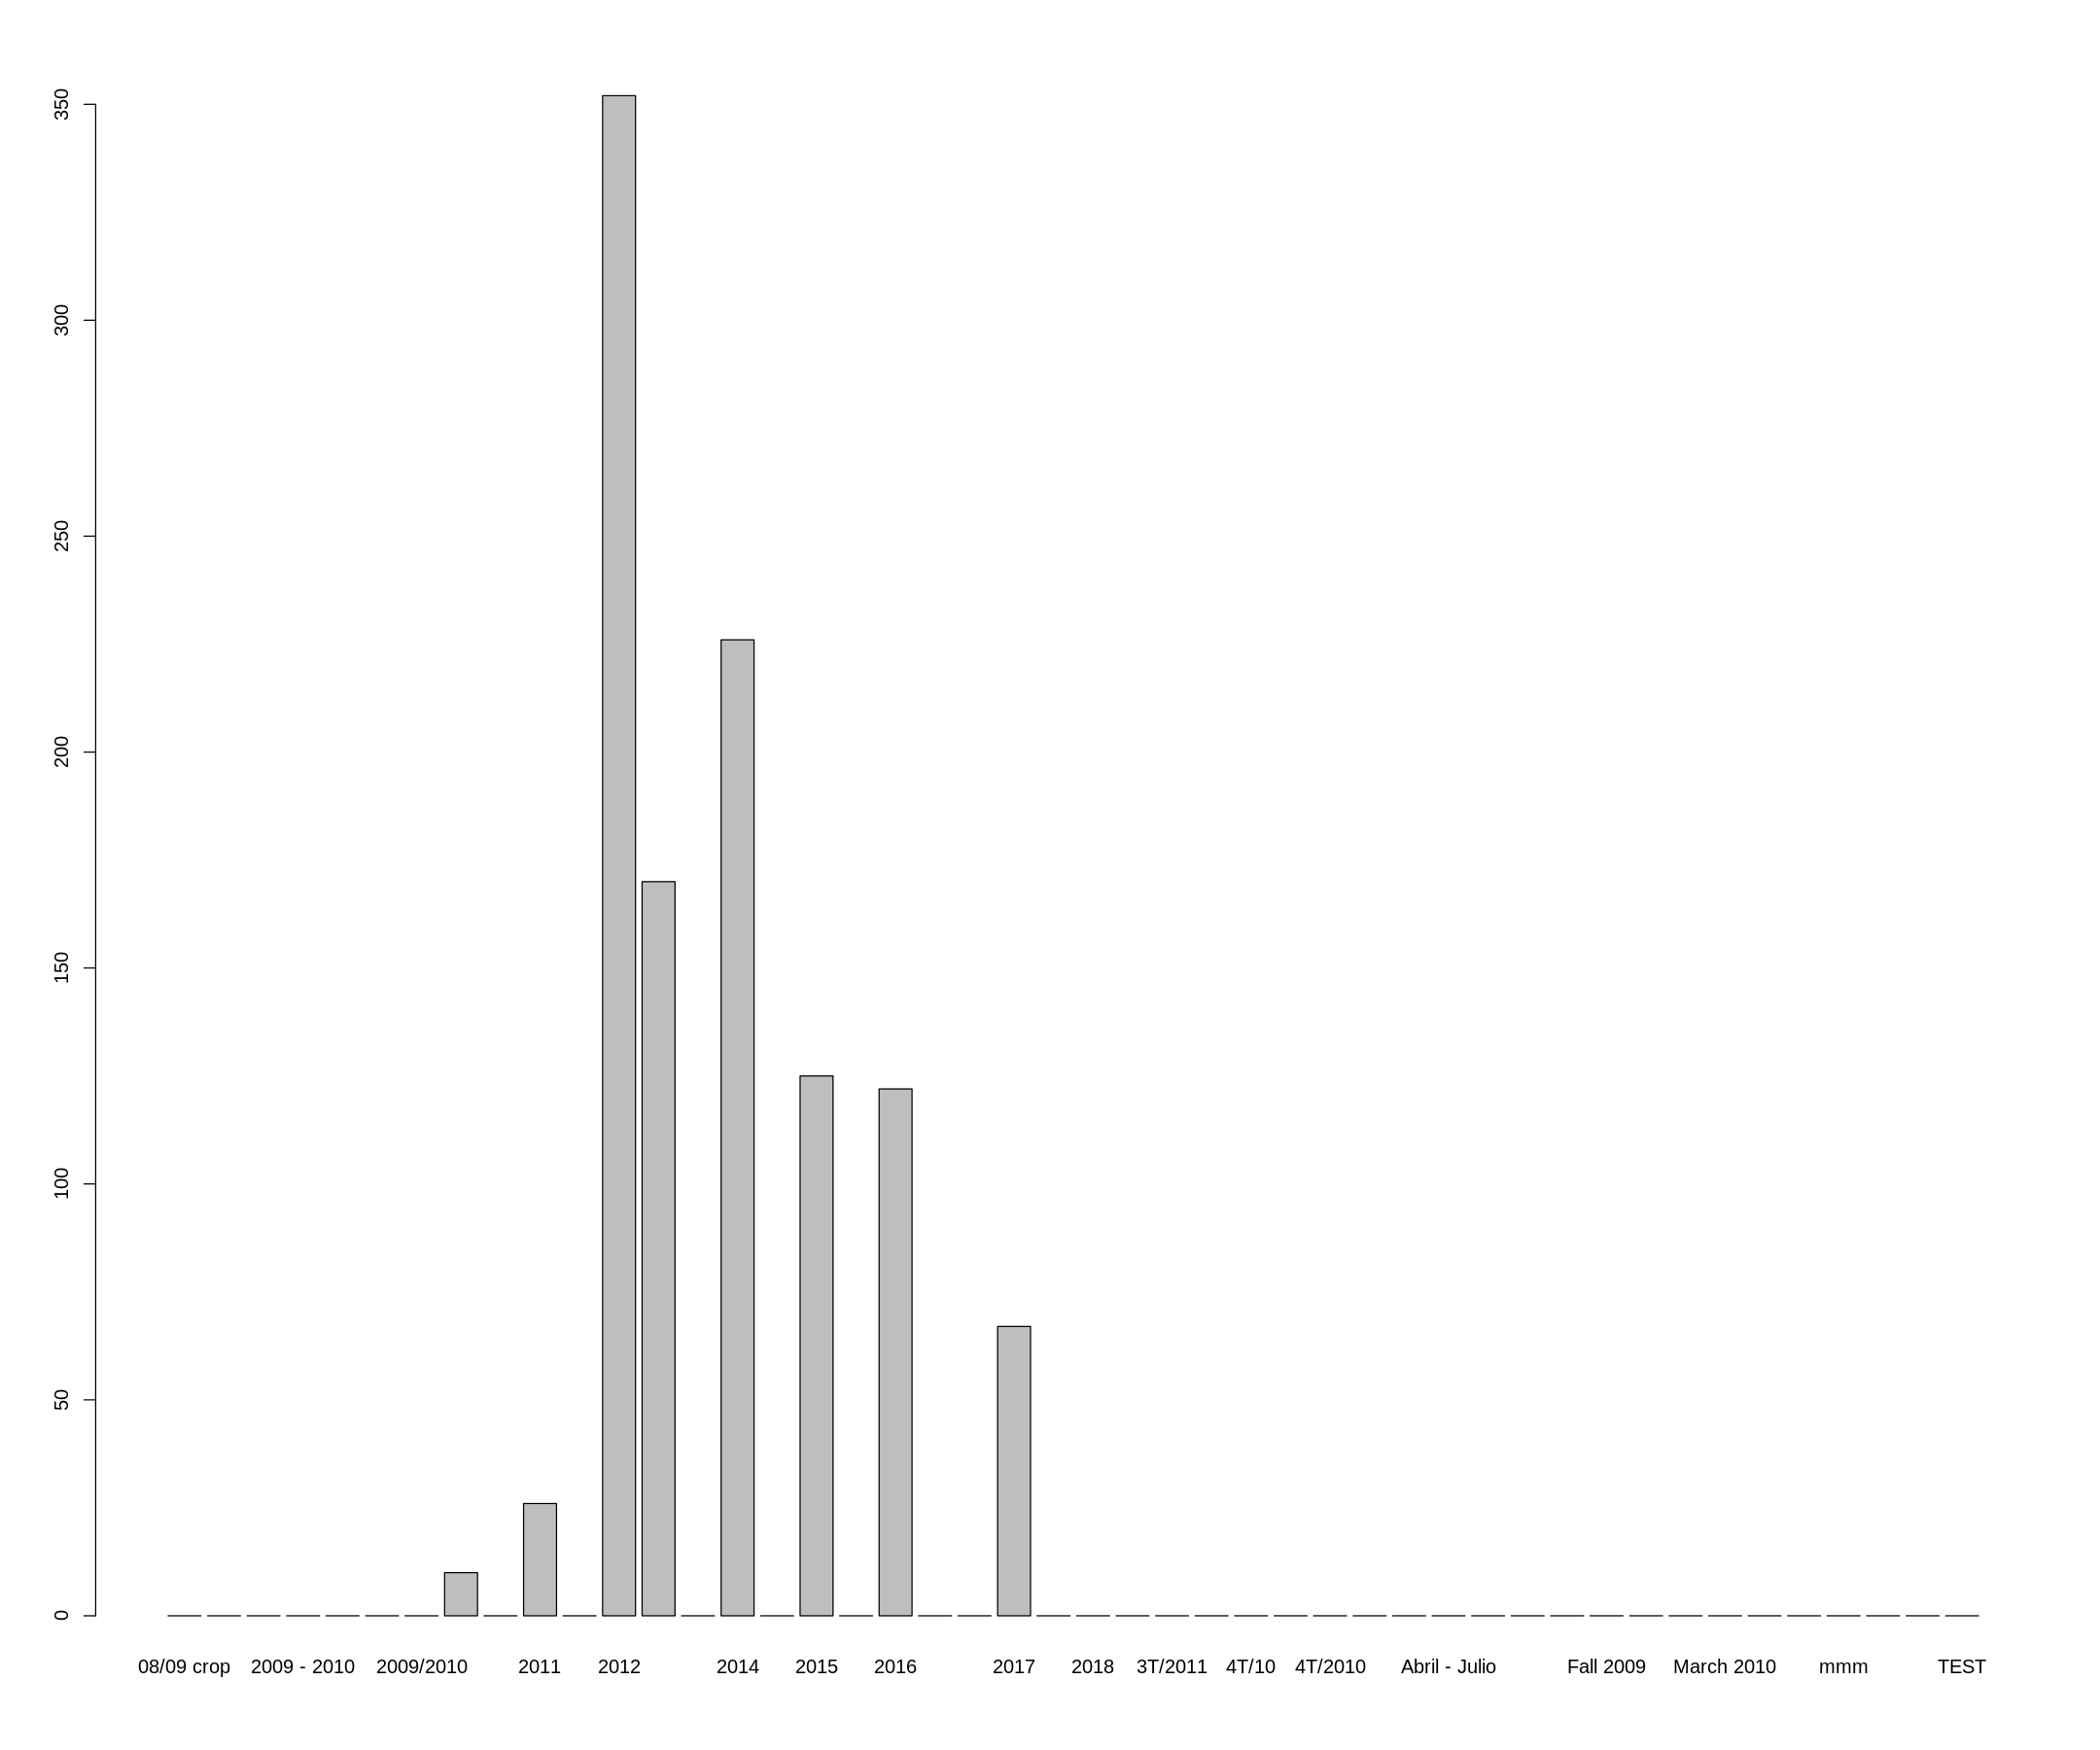

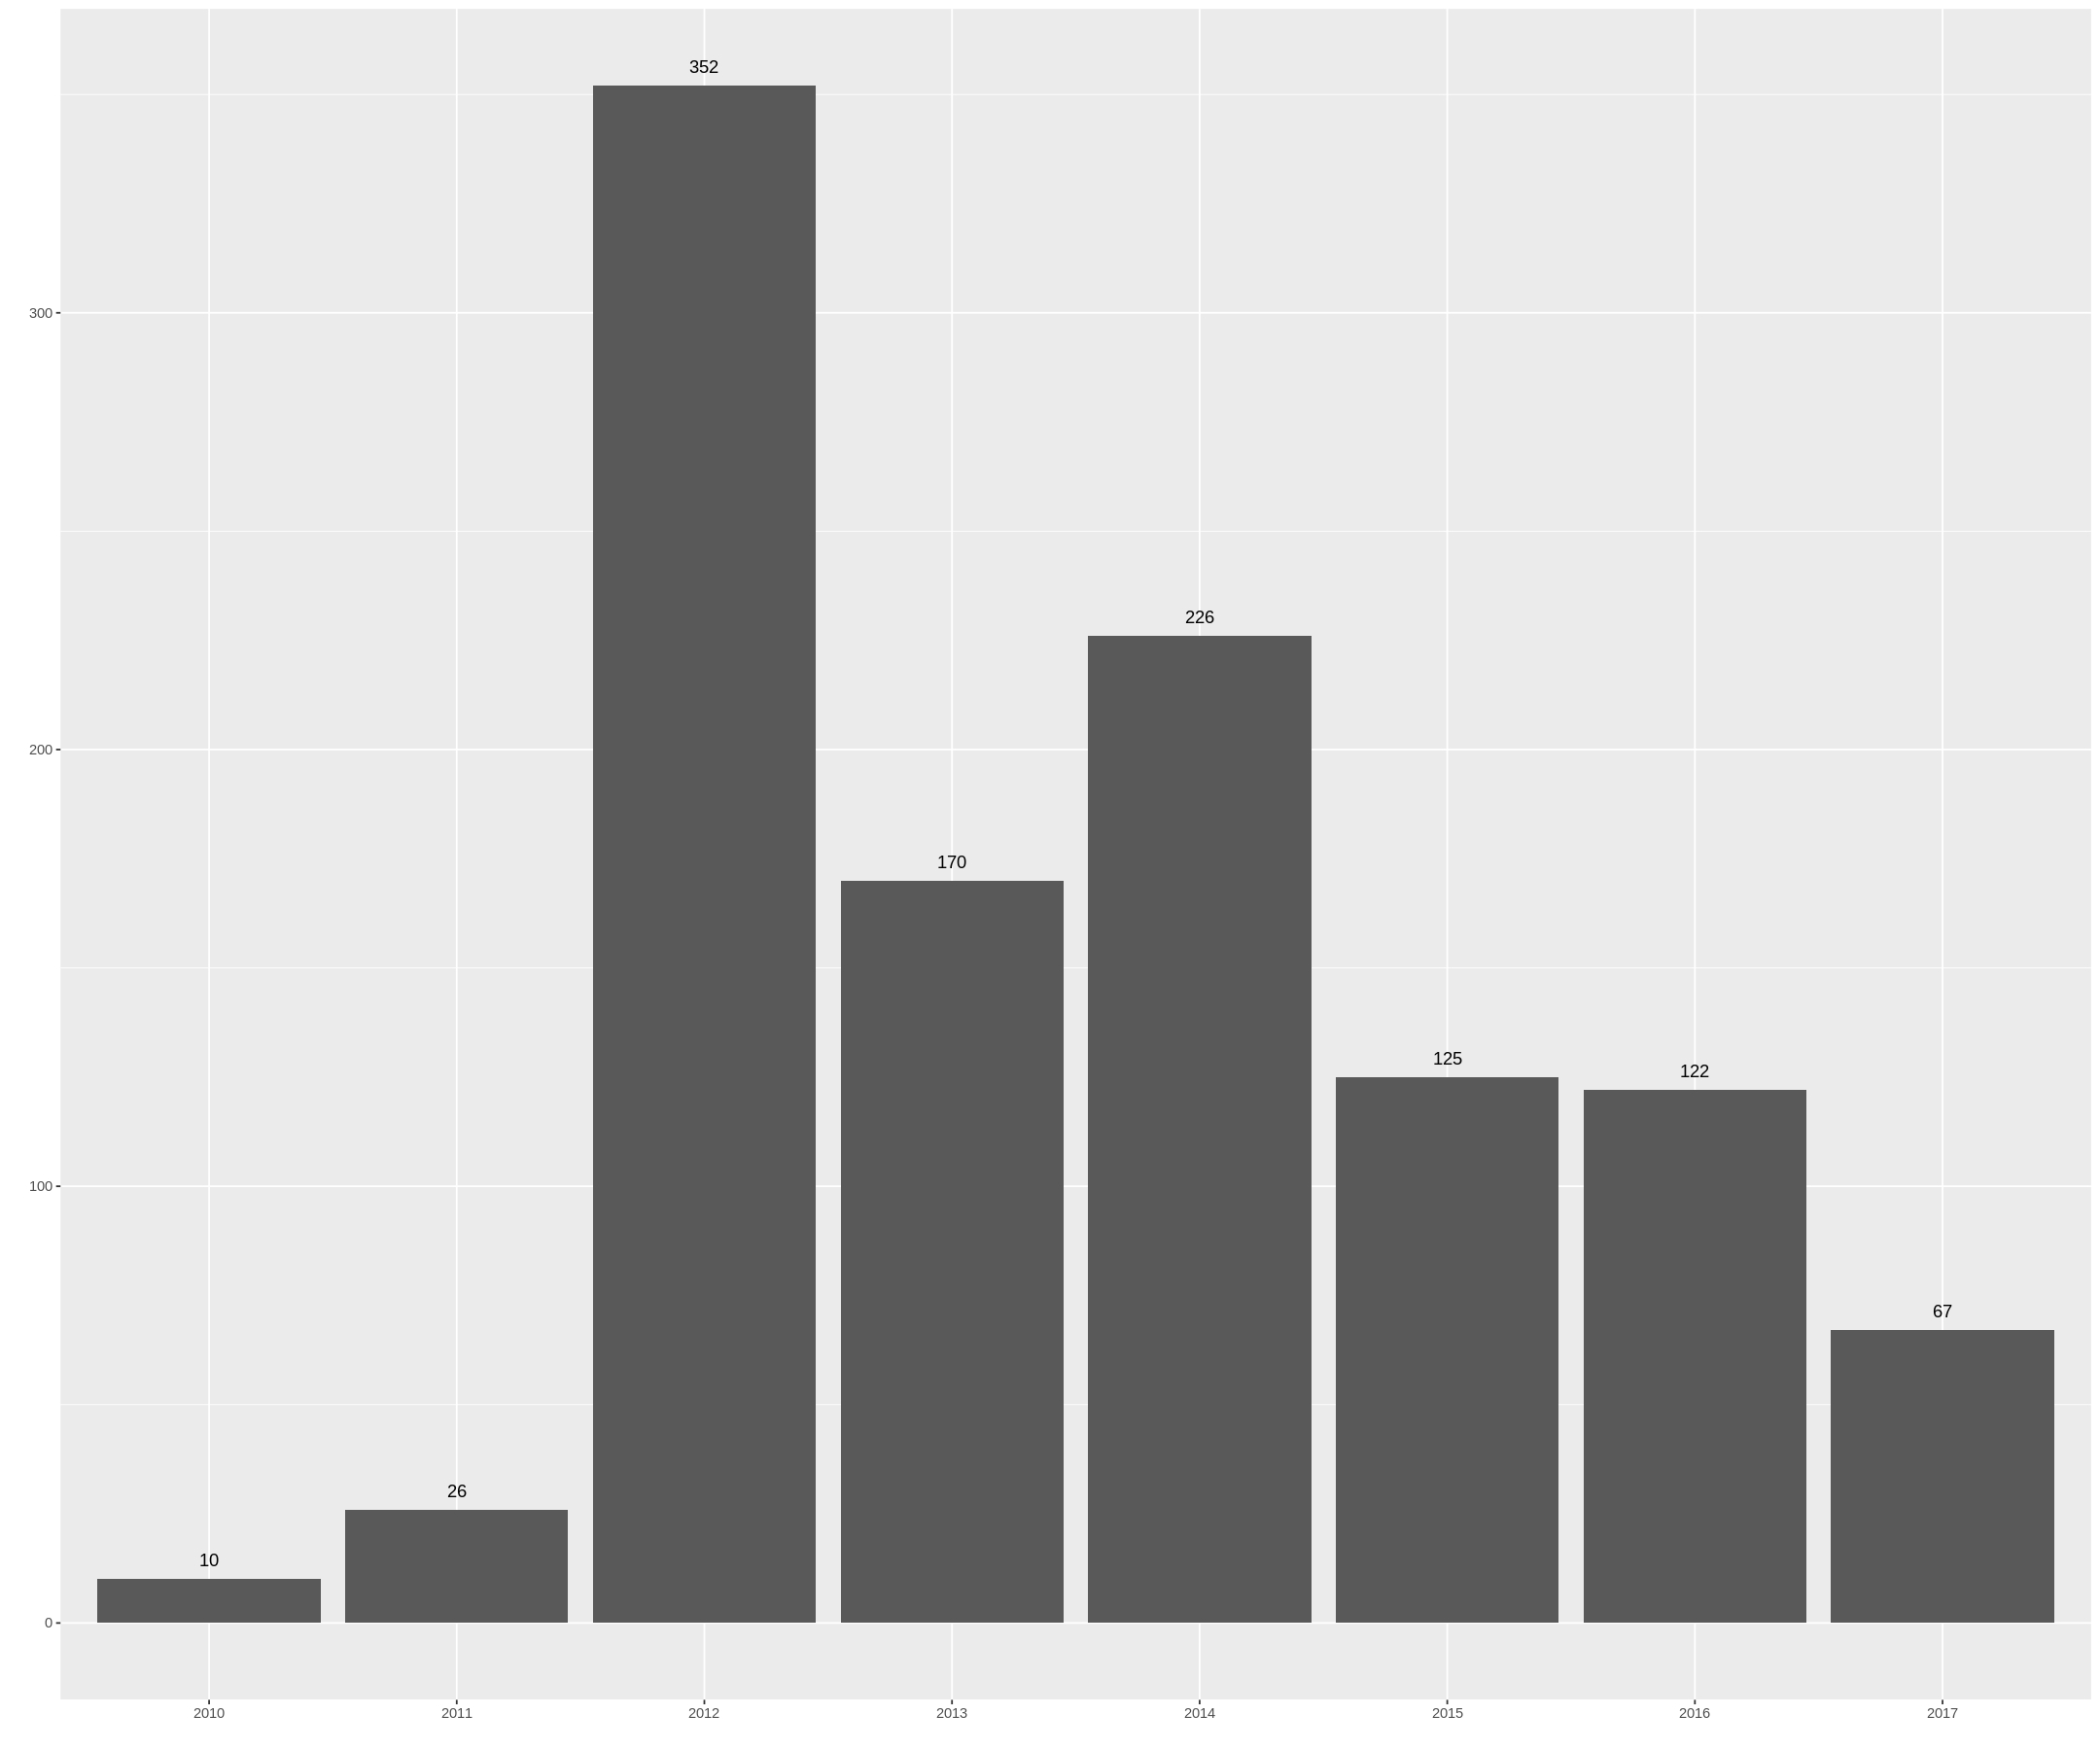

In [ ]:
## Como es el caso real, desconocemos la varianza
media <- mean(muestra)
desv <- sd(muestra)
N <- length(muestra)
error.est <- desv/sqrt(N)
error <- qt(0.975, df= N-1) * error.est # Usar el cuantil 0.975 de t
lim.inf <- media-error
lim.sup <- media+error

qt(0.975, df= N-1)
resultado2 <- data.frame(media, desv, N, error.est, error, lim.inf, lim.sup)
round(t(resultado2),1)

t.test(muestra, mu = mean(muestra), conf.level = 0.95)

freq(dataset1$Harvest.Year, plot = T)

ggplot(data = dataset1, aes(x = Harvest.Year)) + geom_bar(stat = 'count') +
  geom_text(stat='count', aes(label=..count..), vjust=-1) +
  labs(x = '', y = '')

In [ ]:
## Variable dicotomica
cat <- ifelse(dataset2$Harvest.Year=="2014",'2014', 'Others')
round(prop.table(table(cat))*100,1)

cat2 <- ifelse(dataset2$Harvest.Year=="2014", 1, 0)
p <- mean(cat2)
paste0("Prop. 2014: ", round(p*100,1),"%")
paste0("Prop. Others: ", round((1-p)*100,1),"%")

n <- length(cat2) # Tamano de la muestra 
error.est.p <- sqrt((p*(1-p))/n) # Error estandar de la propocion
error.p <- 1.96 * error.est.p # Usamos Z = 1.96 para indicar un nivel de confianza del 95%
lim.inf.p <- p - error.p 
lim.sup.p <- p + error.p

result.p <- data.frame(p, n, error.est.p, error.p, lim.inf.p, lim.sup.p)
round(t(result.p),3)

cat
  2014 Others 
  13.7   86.3 

[1] "Prop. 2014: 13.7%"

[1] "Prop. Others: 86.3%"

p,0.137
n,691.000
error.est.p,0.013
error.p,0.026
lim.inf.p,0.112
lim.sup.p,0.163


In [ ]:
# O usando la funcion binconf
binconf(x = nrow(dataset2[dataset2$Harvest.Year=="2014",]),
        n = nrow(dataset2), alpha = 0.05)

# Para la Varianza
var.test(x=muestra, conf.level=0.95)

,PointEst,Lower,Upper
,0.1374819,0.1138035,0.1651687



	X-squared test for variance

data:  muestra
X-squared = 4680.3, df = 690, p-value < 2.2e-16
alternative hypothesis: true variance is not equal to 1
95 percent confidence interval:
 6.120506 7.559741
sample estimates:
variance of x 
     6.782983 
